# Objective

* Build a Model which identify the bad customer for loan disburement 
* Yes = loan Reject ( Bad Customers ) , No =loan approved ( Good  Customers )

In [3]:
################# Data Analysis & Calculation #################
import numpy as np 
import pandas as pd  

import os

################# ignore Warning #################
import warnings
warnings.filterwarnings("ignore")

################# visualization #################
import matplotlib.pyplot as plt 
import seaborn as sns 

# 1. Data Importing

In [5]:
Bank = pd.read_csv (r"C:\Users\komal\Downloads\Bank_Loan.csv")
Bank.head()

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,LP001002,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,LP001005,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,LP001006,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,LP001008,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Identifying & Treatment Missing Value 

#### 2.1. Data Type and conversion

In [8]:
Bank = Bank.drop('Loan_ID',axis=1)
Bank.head()

,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No


In [35]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  981 non-null    int64 
 1   Gender               957 non-null    object
 2   Married              978 non-null    object
 3   Dependents           981 non-null    int64 
 4   Education            981 non-null    object
 5   Self_Employed        926 non-null    object
 6   ApplicantIncome      981 non-null    int64 
 7   LoanAmount           981 non-null    int64 
 8   Previous_Loan_Taken  981 non-null    object
 9   Cibil_Score          981 non-null    int64 
 10  Property_Area        981 non-null    object
 11  Customer_Bandwith    981 non-null    object
 12  Tenure               981 non-null    int64 
 13  Loan_Status          981 non-null    object
dtypes: int64(6), object(8)
memory usage: 107.4+ KB


#### 2.2. Identifying & Treatment Missing Value

In [36]:
Bank.isnull().sum()

Age                     0
Gender                 24
Married                 3
Dependents              0
Education               0
Self_Employed          55
ApplicantIncome         0
LoanAmount              0
Previous_Loan_Taken     0
Cibil_Score             0
Property_Area           0
Customer_Bandwith       0
Tenure                  0
Loan_Status             0
dtype: int64

In [37]:
Bank.head()

,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No


#### Replacing Missing value by Mode

In [38]:
Bank.Gender.value_counts(dropna=False)

Gender
Male      775
Female    182
NaN        24
Name: count, dtype: int64

In [39]:
for i in ['Gender','Married','Self_Employed']:
    Bank[i].fillna(Bank[i].mode()[0], inplace=True)

In [40]:
Bank.Gender.value_counts(dropna=False)

Gender
Male      799
Female    182
Name: count, dtype: int64

In [41]:
Bank.isnull().sum()

Age                    0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
LoanAmount             0
Previous_Loan_Taken    0
Cibil_Score            0
Property_Area          0
Customer_Bandwith      0
Tenure                 0
Loan_Status            0
dtype: int64

### Outlier

<Axes: >

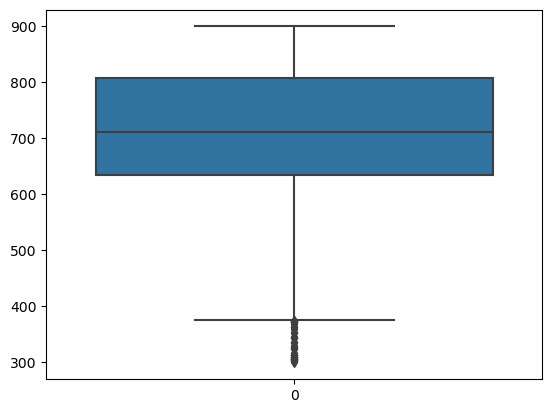

In [42]:
sns.boxplot(data=Bank.Cibil_Score)

# 3. Data Visualization

## Bad Rate Analysis 

In [43]:
Bank.Loan_Status.value_counts(normalize=True)

Loan_Status
No     0.72579
Yes    0.27421
Name: proportion, dtype: float64

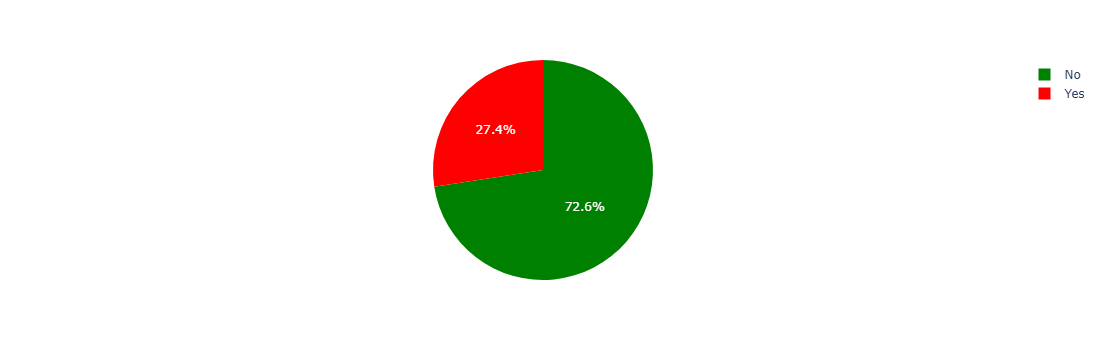

In [44]:
import plotly.express as px

fig = px.pie(Bank,names='Loan_Status',color='Loan_Status',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# 4. Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable
 


In [45]:
Bank.head()

,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No


In [46]:
Quantitative_Variable = Bank.select_dtypes(include=[np.number])
Quantitative_Variable.head(3)

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure
0,43,3,54005,334113,668,43
1,57,2,28817,736026,684,13
2,25,3,99939,712432,788,10


In [47]:
Qualitative_Variable = Bank.select_dtypes(include=['object'])
Qualitative_Variable.head(3)

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,Male,No,Graduate,No,Yes,Urban,Good,No
1,Male,Yes,Graduate,No,Yes,Rural,Good,Yes
2,Male,Yes,Graduate,Yes,Yes,Urban,Good,No


### Converting qualitative Variable into number

In [48]:
from sklearn.preprocessing import LabelEncoder

Qualitative_Variable = Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head(3)

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,1,0,0,0,1,2,1,0
1,1,1,0,0,1,0,1,1
2,1,1,0,1,1,2,1,0


## Combining the data set 

In [49]:
Final_combined = pd.concat([Quantitative_Variable,Qualitative_Variable],axis=1)
Final_combined.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,43,3,54005,334113,668,43,1,0,0,0,1,2,1,0
1,57,2,28817,736026,684,13,1,1,0,0,1,0,1,1
2,25,3,99939,712432,788,10,1,1,0,1,1,2,1,0
3,44,1,38470,267161,888,9,1,1,1,0,1,2,1,0
4,58,1,28991,402474,703,11,1,0,0,0,1,2,1,0


# 5. Data Partition 

In [50]:
from sklearn.model_selection import train_test_split

X = Final_combined.drop('Loan_Status', axis = 1)
Y = Final_combined[['Loan_Status']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=56) 

In [51]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
920,29,3,98044,514905,700,47,1,1,0,1,1,0,1,0
666,20,1,40361,203352,722,46,1,1,0,0,1,1,1,0
797,26,0,81575,180754,803,9,0,1,0,0,1,0,1,0
925,49,5,30054,351494,327,6,0,0,0,0,0,0,0,1
735,38,4,53256,336285,800,45,1,1,0,0,1,0,1,0


# Model building 

# Logistics Regression

In [52]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=56)
Model3 = sfs(logreg, n_features_to_select=5, direction='forward', scoring='accuracy')
Model3.fit(X_train,y_train)  # fit = apply

SequentialFeatureSelector(estimator=LogisticRegression(random_state=56),
                          n_features_to_select=5, scoring='accuracy')

In [53]:
Model3.feature_names_in_

array(['Age', 'Dependents', 'ApplicantIncome', 'LoanAmount',
       'Cibil_Score', 'Tenure', 'Gender', 'Married', 'Education',
       'Self_Employed', 'Previous_Loan_Taken', 'Property_Area',
       'Customer_Bandwith'], dtype=object)

In [54]:
Model3.get_feature_names_out()

array(['Age', 'Cibil_Score', 'Tenure', 'Self_Employed',
       'Previous_Loan_Taken'], dtype=object)

In [55]:
X_train = X_train.loc[:,['Age', 'Cibil_Score','Tenure','Self_Employed', 'Previous_Loan_Taken']]
X_train.head()

,Age,Cibil_Score,Tenure,Self_Employed,Previous_Loan_Taken
920,29,700,47,1,1
666,20,722,46,0,1
797,26,803,9,0,1
925,49,327,6,0,0
735,38,800,45,0,1


In [56]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
Model2 = logreg.fit(X_train, y_train) # model = output

In [57]:
Model2.intercept_  # beto 

array([8.15398843])

In [58]:
Model2.coef_  # Beta 1 -- 

array([[ 0.01323475, -0.00966738, -0.00401974, -0.21346457, -3.59331689]])

In [59]:
Model2.feature_names_in_

array(['Age', 'Cibil_Score', 'Tenure', 'Self_Employed',
       'Previous_Loan_Taken'], dtype=object)

# Step 6 : Predictions on Train Dataset

In [60]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Age,Cibil_Score,Tenure,Self_Employed,Previous_Loan_Taken,Loan_Status
920,29,700,47,1,1,0
666,20,722,46,0,1,0
797,26,803,9,0,1,0
925,49,327,6,0,0,1
735,38,800,45,0,1,0


train['Predicted']=output.predict(X_train)
train.head()

In [61]:
train['Probability_Bad']= Model2.predict_proba(X_train)[:,1]  # [Row , column]
train.head()

,Age,Cibil_Score,Tenure,Self_Employed,Previous_Loan_Taken,Loan_Status,Probability_Bad
920,29,700,47,1,1,0,0.097521
666,20,722,46,0,1,0,0.087913
797,26,803,9,0,1,0,0.052436
925,49,327,6,0,0,1,0.996378
735,38,800,45,0,1,0,0.054619


In [62]:
train['Predicted'] = np.where(train['Probability_Bad'] >= 0.7,1,0) 
train.head()

,Age,Cibil_Score,Tenure,Self_Employed,Previous_Loan_Taken,Loan_Status,Probability_Bad,Predicted
920,29,700,47,1,1,0,0.097521,0
666,20,722,46,0,1,0,0.087913,0
797,26,803,9,0,1,0,0.052436,0
925,49,327,6,0,0,1,0.996378,1
735,38,800,45,0,1,0,0.054619,0


# Step 7 : Model Performance Metrics

In [63]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Loan_Status'])
matrix

array([[553,  97],
       [  9, 125]], dtype=int64)

In [64]:
Accuracy_Train=((553+125)/(784)*100)
print(Accuracy_Train)

86.4795918367347


* Accuracy of Model is 86.47% , So we say Model good fit data  

In [65]:
from sklearn.metrics import classification_report

print(classification_report(train['Loan_Status'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       562
           1       0.93      0.56      0.70       222

    accuracy                           0.86       784
   macro avg       0.89      0.77      0.81       784
weighted avg       0.87      0.86      0.85       784



* Accuracy of  Model is 86%,Hence Model is good Fit on Train dataset
* Accuracy of Bad Customer Capture by Model is 56% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 98% (Specificity)

# Step 8 : Predictions on Test Dataset

In [66]:
X_test = X_test.loc[:,['Age', 'Cibil_Score','Tenure','Self_Employed', 'Previous_Loan_Taken']]
X_test.head()

,Age,Cibil_Score,Tenure,Self_Employed,Previous_Loan_Taken
607,36,707,31,0,1
401,32,415,23,0,1
634,30,839,21,0,1
98,33,862,12,0,1
143,52,643,29,0,1


In [67]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,Age,Cibil_Score,Tenure,Self_Employed,Previous_Loan_Taken,Loan_Status
607,36,707,31,0,1,0
401,32,415,23,0,1,1
634,30,839,21,0,1,0
98,33,862,12,0,1,0
143,52,643,29,0,1,0


In [68]:
test['Probability_Bad'] = Model2.predict_proba(X_test)[:,1]
test.head()

,Age,Cibil_Score,Tenure,Self_Employed,Previous_Loan_Taken,Loan_Status,Probability_Bad
607,36,707,31,0,1,0,0.127602
401,32,415,23,0,1,1,0.706774
634,30,839,21,0,1,0,0.037774
98,33,862,12,0,1,0,0.032796
143,52,643,29,0,1,0,0.252784


In [69]:
test['Predicted'] = np.where(test['Probability_Bad'] >= 0.7,1,0) 
test.head()

,Age,Cibil_Score,Tenure,Self_Employed,Previous_Loan_Taken,Loan_Status,Probability_Bad,Predicted
607,36,707,31,0,1,0,0.127602,0
401,32,415,23,0,1,1,0.706774,1
634,30,839,21,0,1,0,0.037774,0
98,33,862,12,0,1,0,0.032796,0
143,52,643,29,0,1,0,0.252784,0


# Step 9 : Model Performance Metrics on Test data 

In [70]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Loan_Status'])
print(matrix)

[[146  19]
 [  4  28]]


In [71]:
Accuracy_test = ((146+28)/(197)*100)
Accuracy_test

88.3248730964467

In [72]:
from sklearn.metrics import classification_report
print(classification_report(test['Loan_Status'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       150
           1       0.88      0.60      0.71        47

    accuracy                           0.88       197
   macro avg       0.88      0.78      0.82       197
weighted avg       0.88      0.88      0.87       197



* Accuracy of  Model is 88%,Hence Model Performance is good Fit on test Data
* Accuracy of Bad Customer Capture by Model is 60% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 97% 

# Business / Client Submission 

* For future Prediction below 5 variable data is mandatory 

* Note :- If anyone is not present output will not be reliable 

In [73]:
x = list(X_train.columns)
x.insert(0,'Intercept')
Model_Values = pd.DataFrame(np.concatenate((Model2.intercept_.tolist(), Model2.coef_.flatten())),index=x,columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,8.153988
Age,0.013235
Cibil_Score,-0.009667
Tenure,-0.004020
Self_Employed,-0.213465
Previous_Loan_Taken,-3.593317


y = 8.154022 - 0.213460*Self_Employed - 3.593322*Previous_Loan_Taken + 0.013235 * Age - 0.009667*Cibil_Score - 0.004020*Tenure

In [74]:
from sklearn.metrics import classification_report
print(classification_report(train['Loan_Status'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       562
           1       0.93      0.56      0.70       222

    accuracy                           0.86       784
   macro avg       0.89      0.77      0.81       784
weighted avg       0.87      0.86      0.85       784



# Live Data - 10/07/2024

In [75]:
live_data = Bank.loc[[484,192,220,500,399],['Age', 'Cibil_Score', 'Tenure','Self_Employed', 'Previous_Loan_Taken',]]
live_data

,Age,Cibil_Score,Tenure,Self_Employed,Previous_Loan_Taken
484,42,613,11,No,Yes
192,60,377,15,No,Yes
220,21,433,37,No,No
500,23,840,34,No,Yes
399,51,475,30,No,No


In [76]:
number = live_data.select_dtypes(include=[np.number])
number

,Age,Cibil_Score,Tenure
484,42,613,11
192,60,377,15
220,21,433,37
500,23,840,34
399,51,475,30


In [77]:
Category = live_data.select_dtypes(include=['object'])
Category

,Self_Employed,Previous_Loan_Taken
484,No,Yes
192,No,Yes
220,No,No
500,No,Yes
399,No,No


In [78]:
from sklearn.preprocessing import LabelEncoder
Category = Category.apply(LabelEncoder().fit_transform) # label in ascending order
Category.head()

,Self_Employed,Previous_Loan_Taken
484,0,1
192,0,1
220,0,0
500,0,1
399,0,0


In [79]:
Final_live_data = pd.concat([number,Category],axis=1)
Final_live_data .head()

,Age,Cibil_Score,Tenure,Self_Employed,Previous_Loan_Taken
484,42,613,11,0,1
192,60,377,15,0,1
220,21,433,37,0,0
500,23,840,34,0,1
399,51,475,30,0,0


In [80]:
Final_live_data['Probability_Bad'] = Model2.predict_proba(Final_live_data)[:,1]
Final_live_data.head()

,Age,Cibil_Score,Tenure,Self_Employed,Previous_Loan_Taken,Probability_Bad
484,42,613,11,0,1,0.298639
192,60,377,15,0,1,0.838872
220,21,433,37,0,0,0.983653
500,23,840,34,0,1,0.032540
399,51,475,30,0,0,0.983958


In [81]:
Final_live_data['Predicted'] = np.where(Final_live_data['Probability_Bad'] >= 0.7,"Loan Rejected","Loan Approved") 
Final_live_data.head()

,Age,Cibil_Score,Tenure,Self_Employed,Previous_Loan_Taken,Probability_Bad,Predicted
484,42,613,11,0,1,0.298639,Loan Approved
192,60,377,15,0,1,0.838872,Loan Rejected
220,21,433,37,0,0,0.983653,Loan Rejected
500,23,840,34,0,1,0.032540,Loan Approved
399,51,475,30,0,0,0.983958,Loan Rejected


In [82]:
a = 8.15398843 + (0.01323475*42) + (-0.00966738 * 613) +(-0.00401974 * 11)+(-0.21346457 * 0)+(-3.59331689 * 1)
a

-0.8537900399999998

In [83]:
ab = 1/(1+np.exp(-a))
ab

0.29863841499457744

In [84]:
numerator = np.exp(a)
denominator = 1+np.exp(a)
numerator/denominator

0.29863841499457744

# Step 10 :- ROCR Plot

Text(0.5, 1.0, 'Receiver operating characteristic')

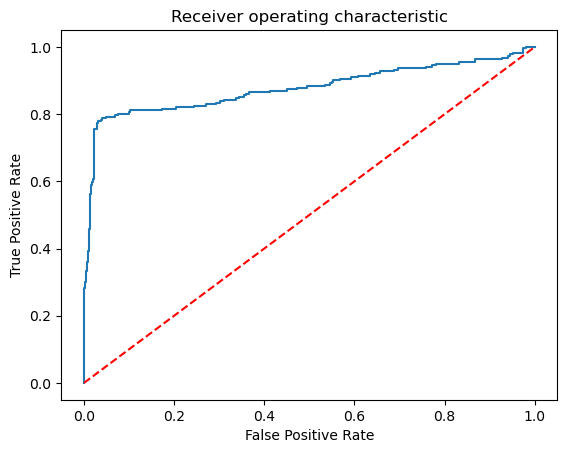

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds= roc_curve(y_train, Model2.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')